[参考] https://www.kaggle.com/code/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 12.0 MB/s 
     |████████████████████████████████| 235 kB 51.6 MB/s 
     |████████████████████████████████| 749 kB 32.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 74 kB/s 


In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import GroupKFold,GroupShuffleSplit,KFold,ShuffleSplit,StratifiedKFold
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

import torch

import dill
from sklearn.feature_extraction.text import TfidfVectorizer
import gc
import time

import hashlib

import texthero as hero
from texthero import preprocessing

import catboost as ctb
from catboost import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
DIR = "/content/drive/MyDrive/分析＿遊び/神野君英語課題/久力さん"
INPUT_DIR = os.path.join(DIR,"input") 
DATA_DIR = os.path.join(INPUT_DIR,"Dataset")
PREPROCESS_DIR = os.path.join(INPUT_DIR,"Preprocessing")

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR,"tweets.csv"))
df

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655
...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456


In [ ]:
print(f"Number of rows : {df.shape[0]}\nNumber of cols : {df.shape[1]}\nNumber of miss values : {df.isnull().sum().sum()}")

Number of rows : 52542
Number of cols : 10
Number of miss values : 157588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [ ]:
df.isnull().sum()

author                  0
content                 0
country             52506
date_time               0
id                      0
language                0
latitude            52541
longitude           52541
number_of_likes         0
number_of_shares        0
dtype: int64

#EDA

TheEllenShow     3147
jimmyfallon      3123
ArianaGrande     3104
YouTube          3077
KimKardashian    2939
katyperry        2924
selenagomez      2913
rihanna          2877
BarackObama      2863
britneyspears    2776
instagram        2577
shakira          2530
Cristiano        2507
jtimberlake      2478
ladygaga         2329
Twitter          2290
ddlovato         2217
taylorswift13    2029
justinbieber     2000
cnnbrk           1842
Name: author, dtype: int64


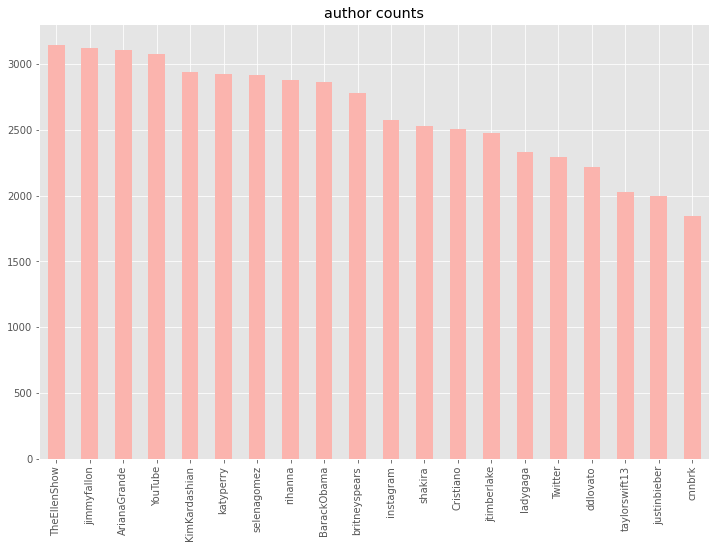

In [ ]:
print(df.author.value_counts())
fig , ax = plt.subplots(figsize=[12,8])
df.author.value_counts().plot(kind='bar',title='author counts',ax=ax,cmap = 'Pastel1')

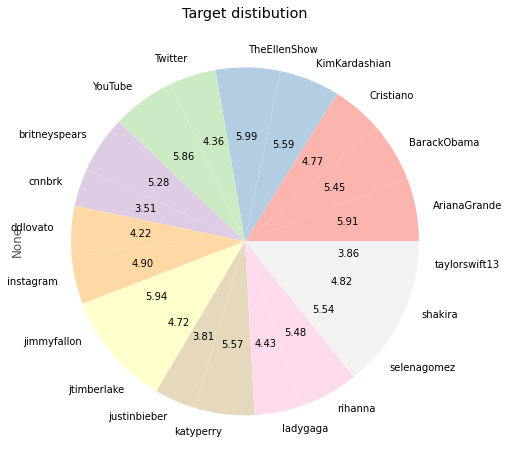

In [ ]:
fig, ax = plt.subplots(figsize=[12,8])
df.groupby('author').size().plot(kind='pie',autopct='%.2f',ax=ax,title='Target distibution' , cmap = "Pastel1")

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
df["length"] = df["content"].apply(length)

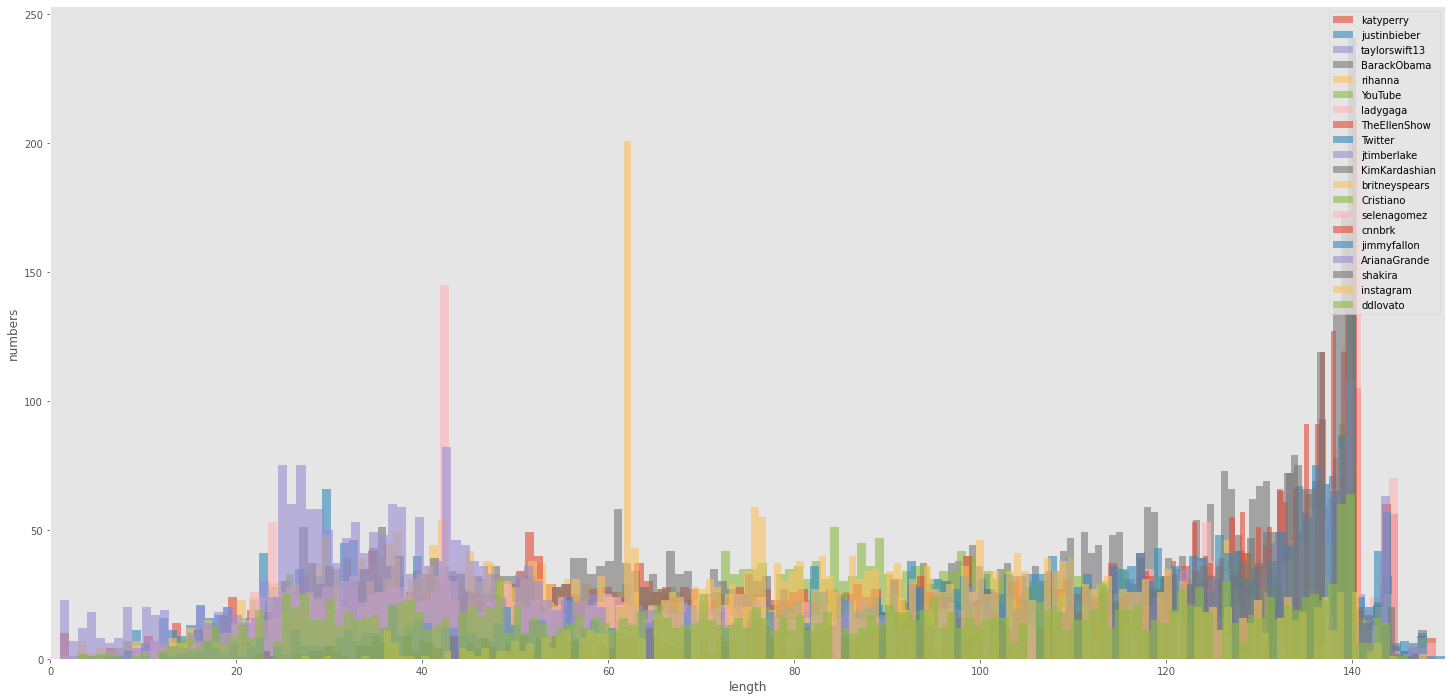

In [ ]:
plt.rcParams['figure.figsize'] = (25.0, 12.0)
bins = 150
for target in list(df.author.unique()):
  plt.hist(df[df.author == f"{target}"]["length"], alpha = 0.6, bins=bins, label=f"{target}")
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

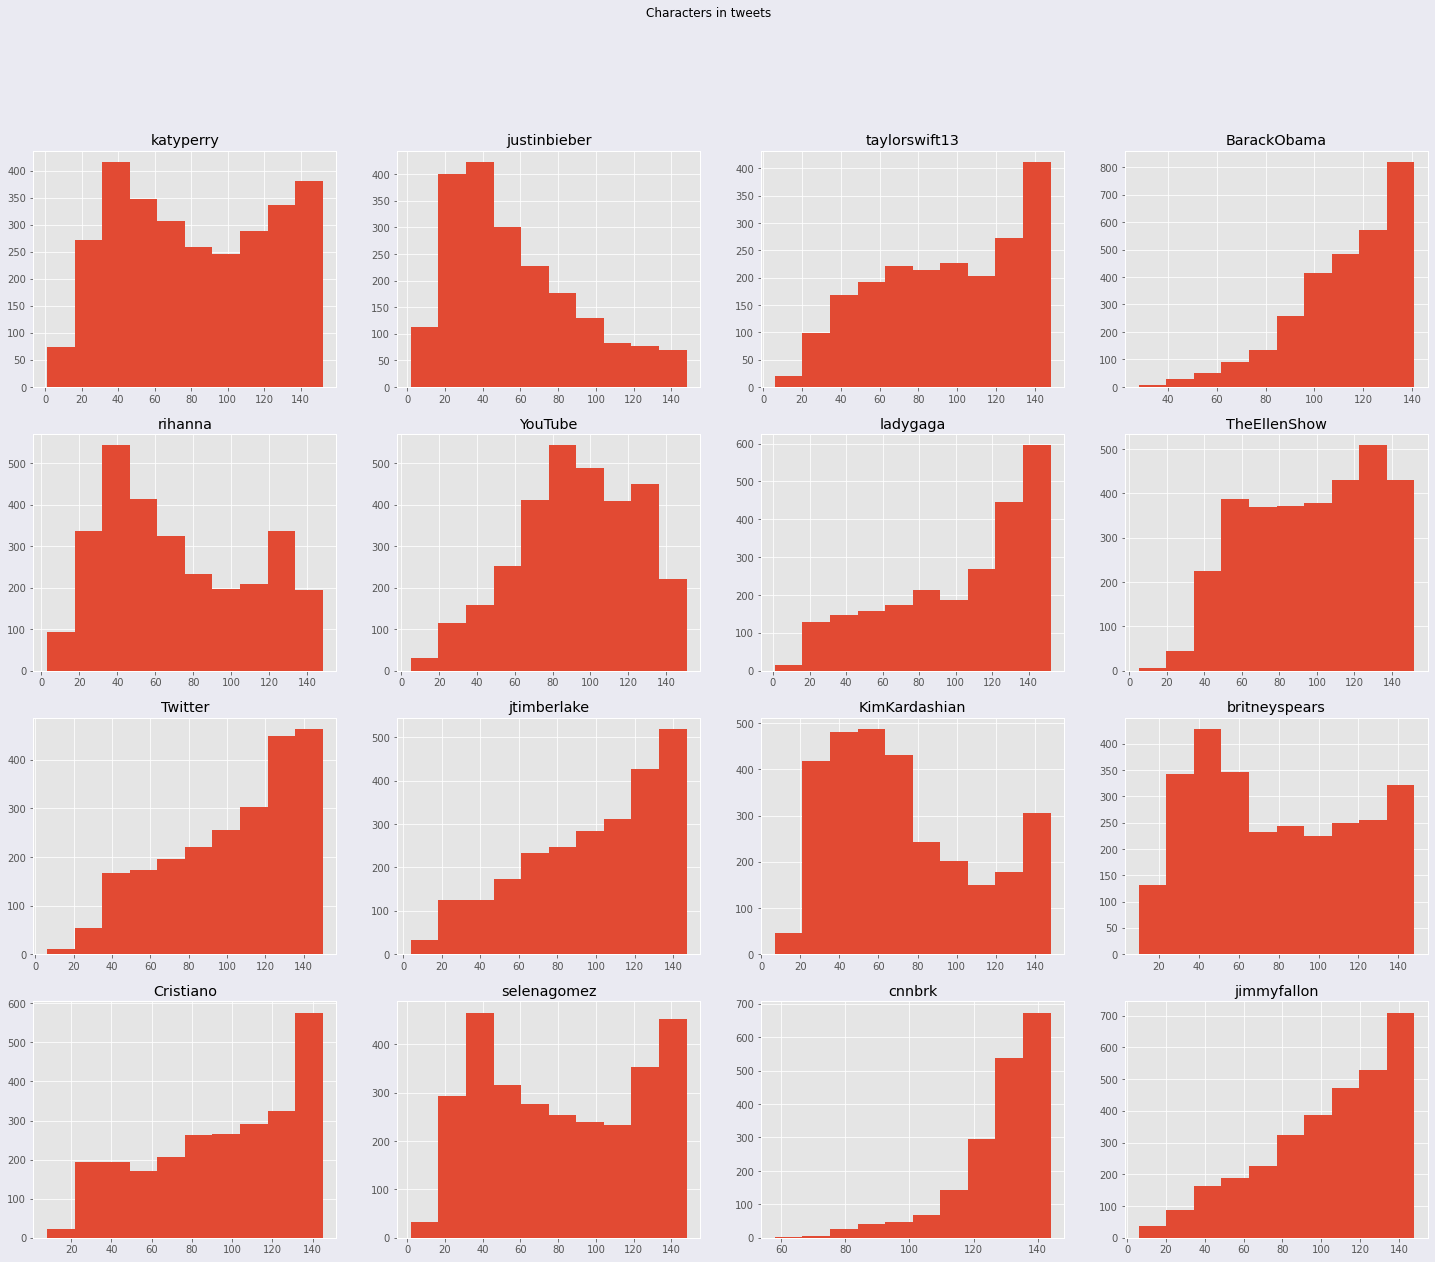

In [ ]:
#ワード数
AUTHORS = list(df.author.unique())
ncols = 4
nrows = int(len(AUTHORS)/ncols + (len(AUTHORS)%ncols > 0)) - 1

fig,axes = plt.subplots(nrows,ncols,figsize=(25,5*nrows),facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r*ncols + c > len(AUTHORS):
            break
        target = AUTHORS[r*ncols+c]
        tweet_len=df[df.author==f"{target}"].content.str.len()
        axes[r,c].hist(tweet_len)
        axes[r,c].set_title(f"{target}")

fig.suptitle('Characters in tweets')
plt.show()

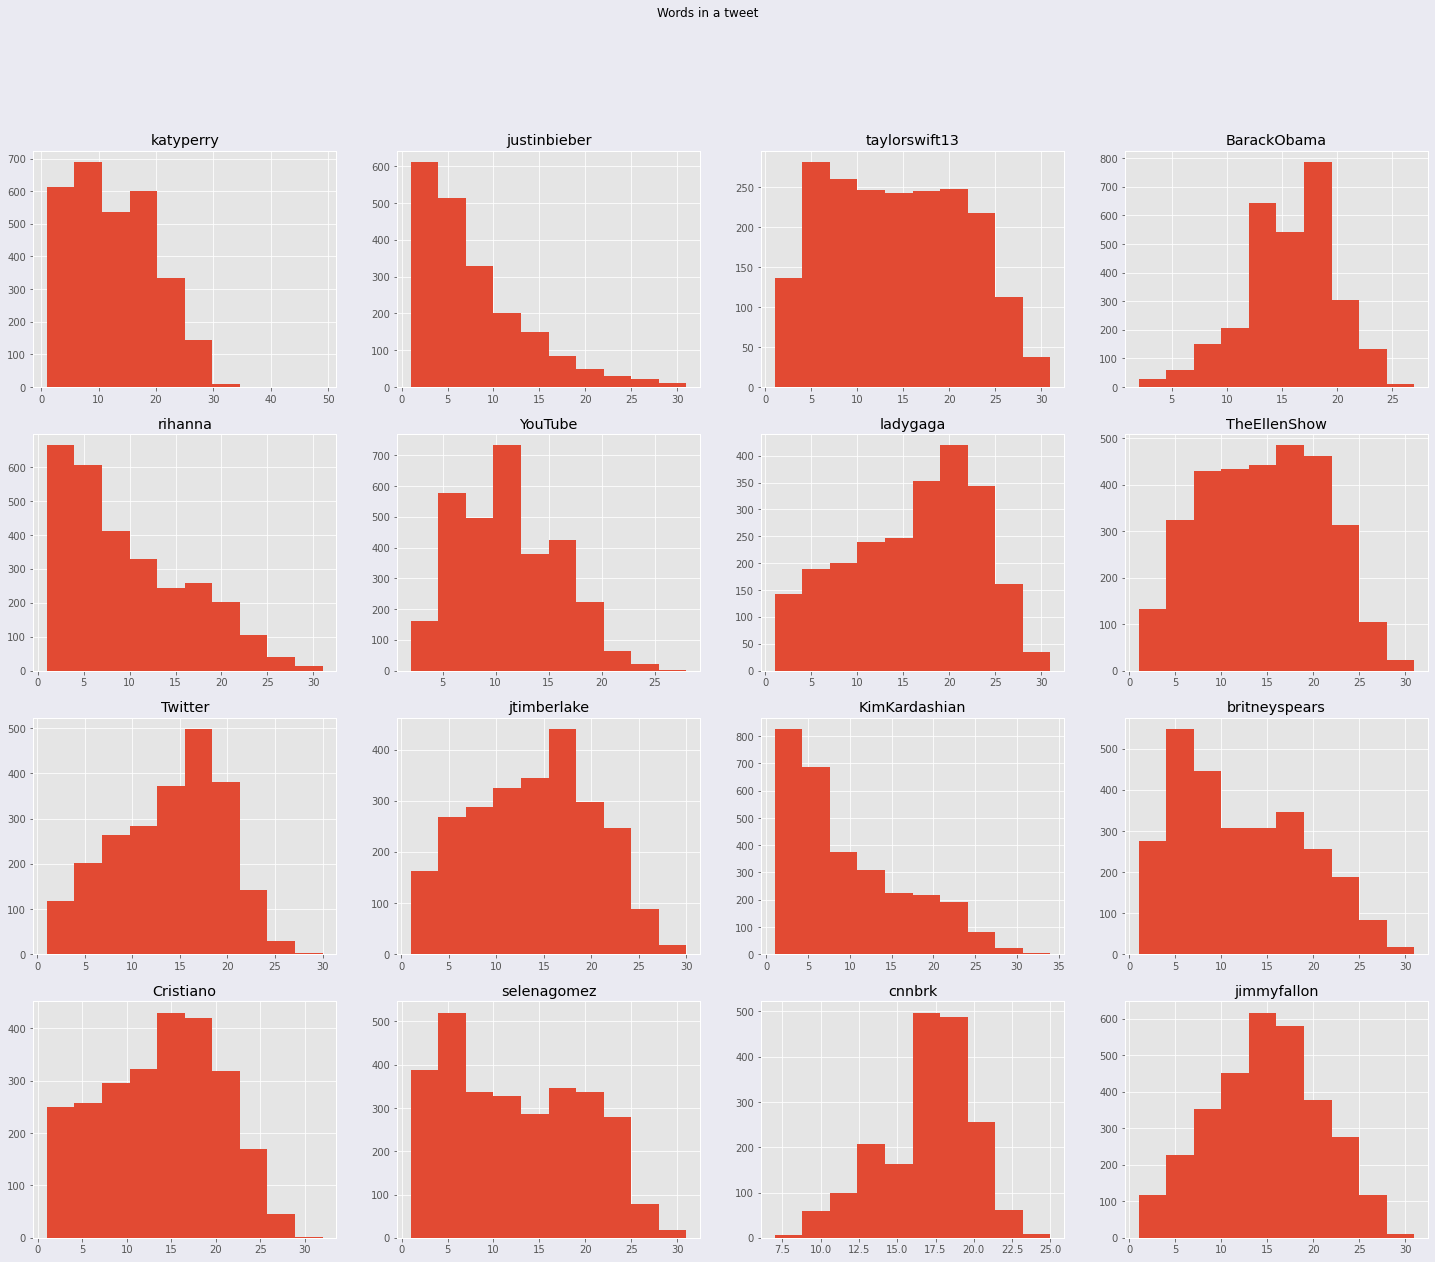

In [ ]:
#単語数
AUTHORS = list(df.author.unique())
ncols = 4
nrows = int(len(AUTHORS)/ncols + (len(AUTHORS)%ncols > 0)) - 1

fig,axes = plt.subplots(nrows,ncols,figsize=(25,5*nrows),facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r*ncols + c > len(AUTHORS):
            break
        target = AUTHORS[r*ncols+c]
        tweet_len=df[df.author==f"{target}"].content.str.split().map(lambda x: len(x))
        axes[r,c].hist(tweet_len)
        axes[r,c].set_title(f"{target}")

fig.suptitle('Words in a tweet')
plt.show()

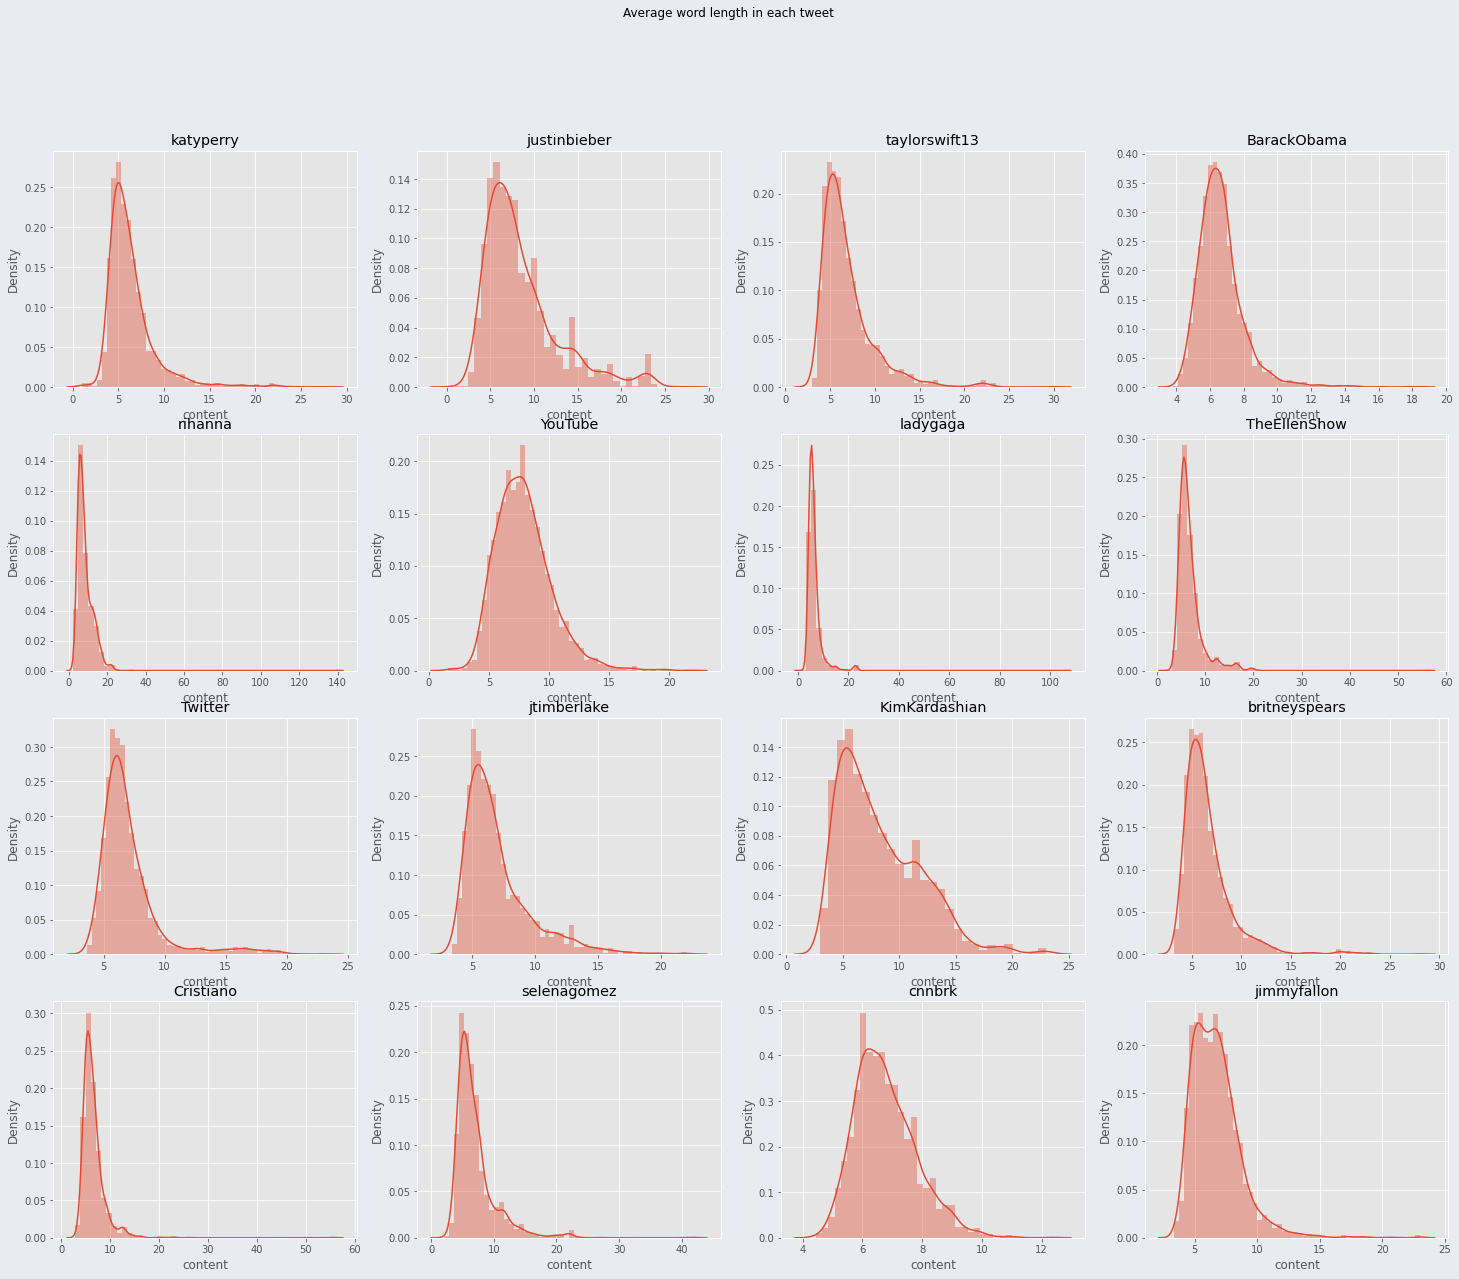

In [ ]:
#単語数Average
AUTHORS = list(df.author.unique())
ncols = 4
nrows = int(len(AUTHORS)/ncols + (len(AUTHORS)%ncols > 0)) - 1

fig,axes = plt.subplots(nrows,ncols,figsize=(25,5*nrows),facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r*ncols + c > len(AUTHORS):
            break
        target = AUTHORS[r*ncols+c]
        word=df[df.author==f"{target}"].content.str.split().apply(lambda x : [len(i) for i in x])
        sns.distplot(word.map(lambda x: np.mean(x)),ax=axes[r,c])
        axes[r,c].set_title(f"{target}")

fig.suptitle('Average word length in each tweet')
plt.show()

In [ ]:
def create_corpus(df,target="katyperry"):
    corpus=[]
    
    for x in df[df.author==f"{target}"].content.str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
np.array(stop)

array({"you'd", 'hasn', 'wouldn', 'was', 'with', "wouldn't", 'shouldn', 'in', 'very', 'her', 'does', 'did', 'you', 'should', 'doing', 'me', 'own', "mustn't", "weren't", 'now', 've', 'hadn', 'whom', 'and', 'y', 'most', 'will', 'ain', 'nor', "shouldn't", "don't", 'myself', 'more', "won't", 'hers', 'didn', 'too', 'theirs', 'his', 'as', 'other', 'don', 're', 'these', 'd', 'or', "you'll", "wasn't", 'himself', 'here', 'over', 'into', 'above', 'from', 'again', 'yourself', 'been', 'where', 'then', "shan't", "you've", 'about', 'yours', 'ourselves', "mightn't", 'o', 'when', 'mustn', "that'll", 'm', "needn't", 'she', 'before', 'had', 'up', 's', 'why', "it's", 'can', 'him', 'wasn', 'themselves', 'not', 'is', 'i', 'no', 'during', 'mightn', 'further', 'each', 'so', 'won', 'through', 'if', 'same', 'just', 'some', "you're", "aren't", 'under', 'once', 'down', 'all', 'having', 'to', 'both', "hadn't", 'a', 'them', "isn't", 'shan', 'the', 'doesn', 'between', "hasn't", "couldn't", 'that', 'yourselves', 'th

<BarContainer object of 10 artists>

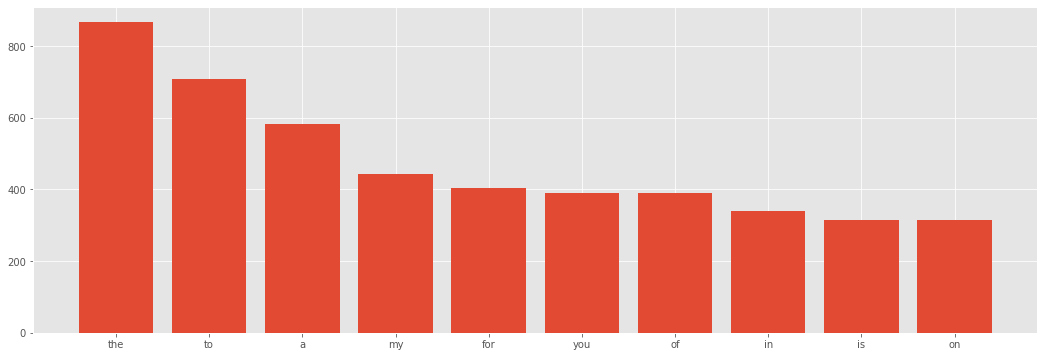

In [ ]:
corpus=create_corpus(df)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

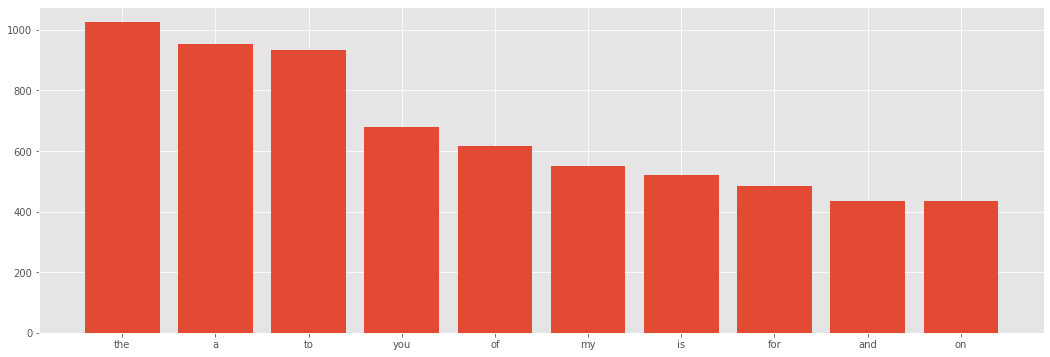

In [ ]:
corpus=create_corpus(df,"TheEllenShow")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

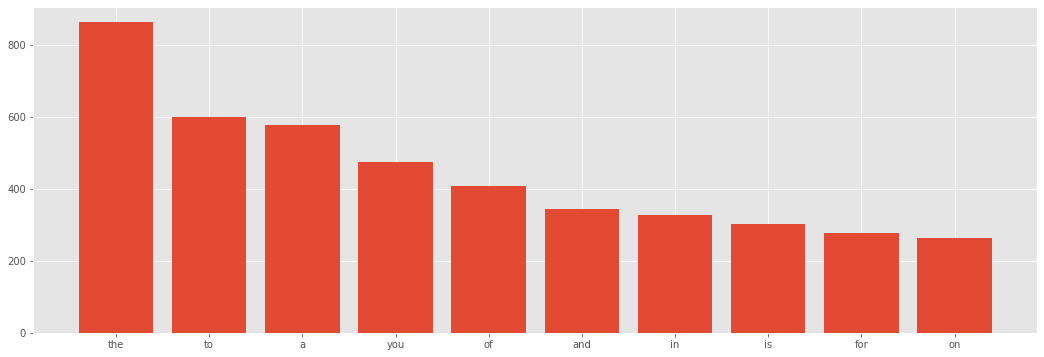

In [ ]:
corpus=create_corpus(df,"YouTube")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

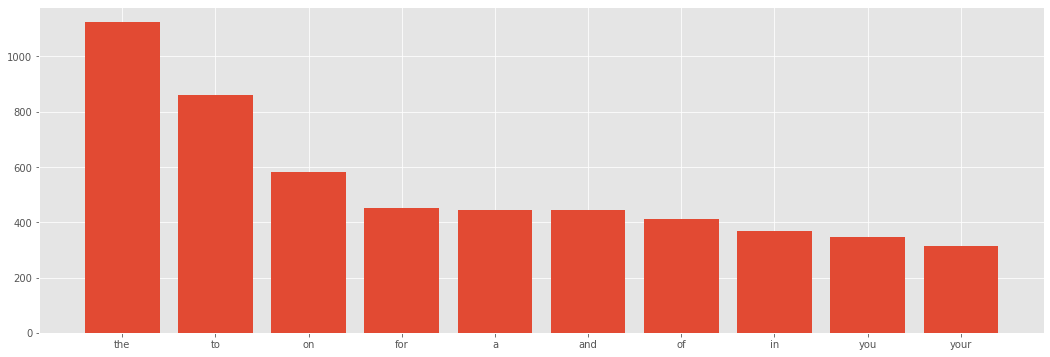

In [ ]:
corpus=create_corpus(df,"Twitter")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 12 artists>

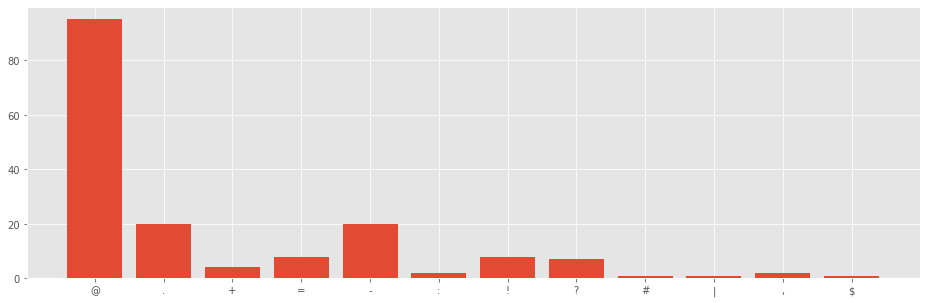

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(df)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 14 artists>

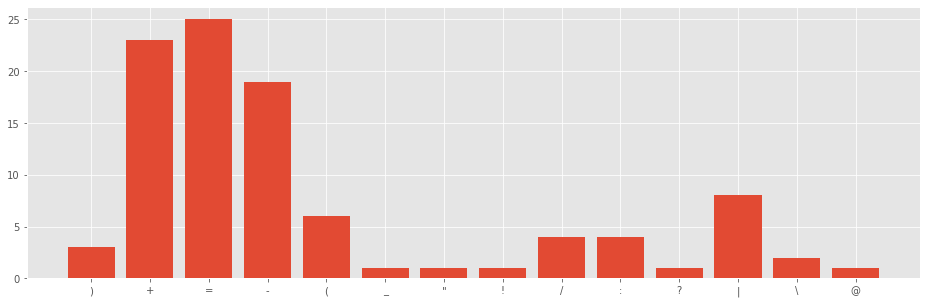

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(df,"YouTube")

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 14 artists>

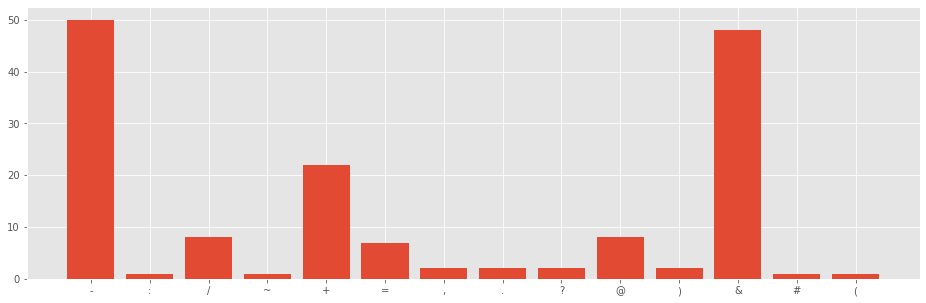

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(df,"Twitter")

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

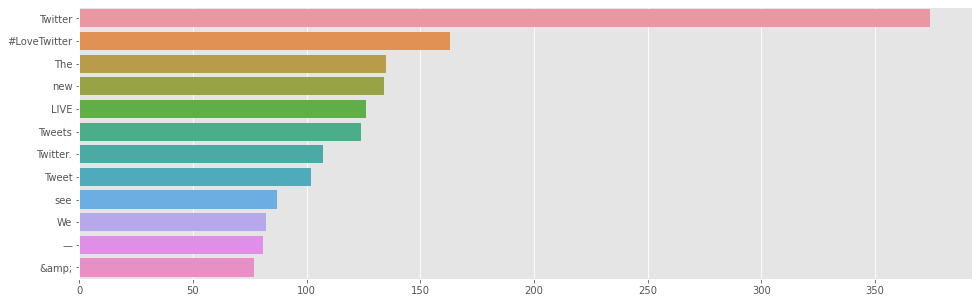

In [ ]:
#Twitter
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

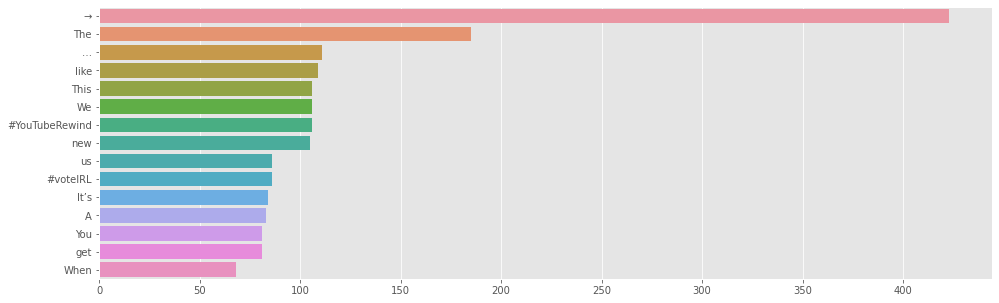

In [ ]:
#YouTube
plt.figure(figsize=(16,5))
corpus=create_corpus(df,"YouTube")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

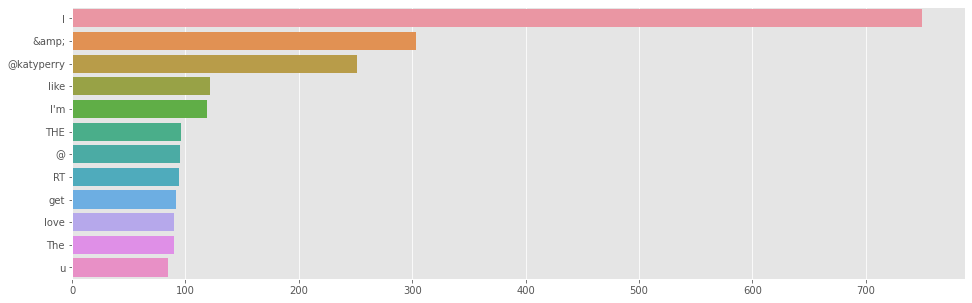

In [ ]:
#katyperry
plt.figure(figsize=(16,5))
corpus=create_corpus(df)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

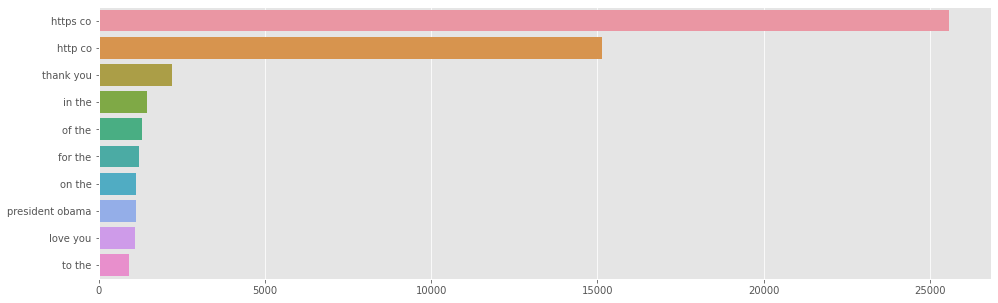

In [ ]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df.content)[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

##Data Cleaning

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df.content = df.content.apply(lambda x : remove_URL(x))

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df.content = df.content.apply(lambda x : remove_html(x))

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df.content = df.content.apply(lambda x: remove_emoji(x))

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df.content = df.content.apply(lambda x : remove_punct(x))

34227
['Is', 'history', 'repeating', 'itselfDONTNORMALIZEHATE', 'barackobama', 'Thank', 'you', 'for', 'your', 'incredible']


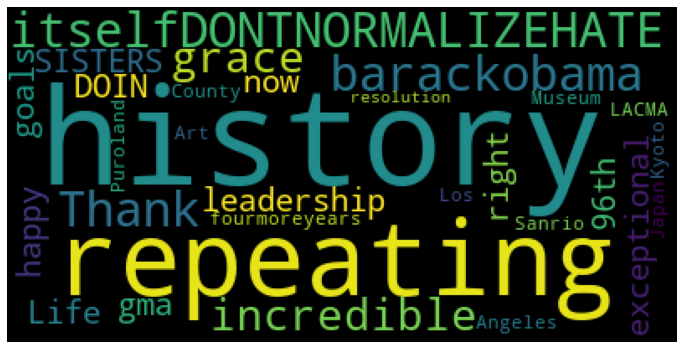

In [ ]:
corpus_new_katyperry=create_corpus(df)
print(len(corpus_new_katyperry))
print(corpus_new_katyperry[:10])
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new_katyperry[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

28665
['You', 'must', 'be', 'at', 'least', '1', '½', 'inches', 'tall', 'to']


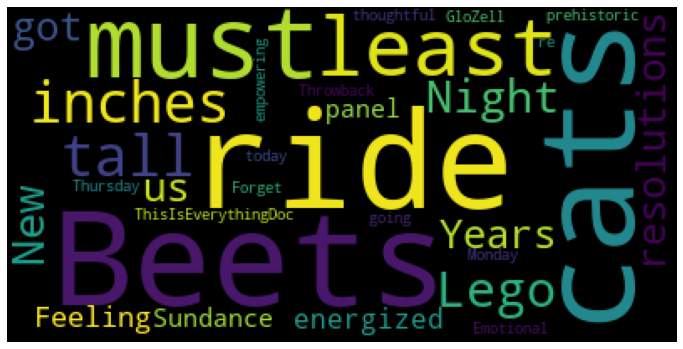

In [ ]:
corpus_new_YouTube=create_corpus(df,"YouTube")
print(len(corpus_new_YouTube))
print(corpus_new_YouTube[:10])
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new_YouTube[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

29055
['ashleyardinger', 'We', 'shall', 'dub', 'thee', '“Meme', 'Master', 'Ashley', 'wakandaho', 'ashleyardinger']


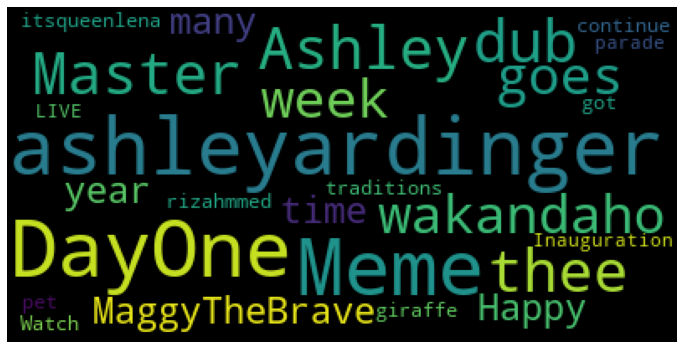

In [ ]:
corpus_new_Twitter=create_corpus(df,"Twitter")
print(len(corpus_new_Twitter))
print(corpus_new_Twitter[:10])
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new_Twitter[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
#空欄にNanという単語を入れる
df["content"].replace(" ","Nan",inplace=True)
df

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,length
0,katyperry,Is history repeating itselfDONTNORMALIZEHATE,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,73
1,katyperry,barackobama Thank you for your incredible grac...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,116
2,katyperry,Life goals,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,35
3,katyperry,Me right now,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,39
4,katyperry,SISTERS ARE DOIN IT FOR THEMSELVES,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,67
...,...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,Life couldnt be better right now,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796,36
52538,ddlovato,First Monday back in action Id say 216 miles i...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511,63
52539,ddlovato,Crime shows buddy snuggles the perfect Sunday...,NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583,60
52540,ddlovato,Nan,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456,25


##Word2Vec

In [ ]:
#ベクトル化
vec_tfidf = TfidfVectorizer(min_df=20)
abstract_tfidf = vec_tfidf.fit_transform(df.content.values)

In [ ]:
start = time.time()

sentences = []
print("Parsing sentences from training set ...")

#Loop over each article.
for review in tqdm(df.content):
  try:
    #split a review into parsed sentence
    result = review
    h = result.split(" ")
    h = list(filter(("").__ne__,h))
    sentences.append(h)
  except:
    continue

num_features = 200
min_word_count = 20
num_workers = 1
context = 10
downsampling = 1e-3
seed = 2022

hashfxn = lambda x: int(hashlib.md5(str(x).encode()).hexdigest(),16)

print("Training Word2Vec model...")
#Train Word2Vec model
model = Word2Vec(sentences,workers=num_workers,hs=0,sg=1,negative=10,iter=5,size=num_features,min_count=min_word_count,hashfxn=hashfxn,window=context,sample=downsampling,seed=seed)
model_name = str(num_features) + "features_" + str(min_word_count) + "minwords_" + str(context) + "context_len2alldata"
model.init_sims(replace=True)
endmodeltime = time.time()

print("time: ",endmodeltime-start)

Parsing sentences from training set ...


100%|██████████| 52542/52542 [00:00<00:00, 285282.63it/s]

Training Word2Vec model...


time:  27.673088312149048


In [ ]:
tqdm.pandas()

def des_to_mean_vec(text):
  try:
    text = text.strip()
    text_ls = [s for s in text.split(' ') if '' != s]
    return np.mean([model.wv[word] for word in text_ls if word in model.wv.index2word],axis=0)
  except:
    return np.nan

word2vec_df = df.content.progress_apply(lambda x: des_to_mean_vec(x))
word2vec_df.head()

100%|██████████| 52542/52542 [00:19<00:00, 2736.83it/s]


0    [-0.037302323, -0.058959063, 0.014117177, -0.0...
1    [0.019113978, -0.061213154, -0.008818905, -0.0...
2    [-0.0018740911, -0.060316347, -0.024763322, -0...
3    [-0.027483463, -0.04293849, -0.028281277, -0.0...
4    [0.024895148, 0.017154373, -0.003021559, -8.50...
Name: content, dtype: object

In [ ]:
content_df = pd.DataFrame()
for num in tqdm(list(range(0,68000,1000))):
  content_df = pd.concat([content_df,word2vec_df.iloc[num:num+1000].apply(pd.Series)])
content_df.columns = ['w2v_content_' + str(col) for col in content_df.columns]
content_df.head()

100%|██████████| 68/68 [00:10<00:00,  6.37it/s]


,w2v_content_0,w2v_content_1,w2v_content_2,w2v_content_3,w2v_content_4,w2v_content_5,w2v_content_6,w2v_content_7,w2v_content_8,w2v_content_9,...,w2v_content_190,w2v_content_191,w2v_content_192,w2v_content_193,w2v_content_194,w2v_content_195,w2v_content_196,w2v_content_197,w2v_content_198,w2v_content_199
0,-0.037302,-0.058959,0.014117,-0.090011,-0.007072,0.055448,0.097038,-0.041137,-0.012586,-0.096235,...,-0.043358,0.004904,-0.021615,-0.022413,0.036620,0.019018,-0.041913,-0.061185,0.009255,0.023942
1,0.019114,-0.061213,-0.008819,-0.039185,0.042564,0.045340,0.080944,0.022669,-0.009640,-0.065593,...,-0.064947,-0.001366,0.023246,-0.034184,0.019603,-0.009582,-0.072600,-0.007886,0.042576,0.038451
2,-0.001874,-0.060316,-0.024763,-0.069574,-0.019425,0.060839,0.109874,-0.065317,0.057494,-0.060560,...,-0.075969,0.036438,0.000323,-0.058008,0.041354,0.056790,-0.046139,-0.056291,0.061038,-0.027712
3,-0.027483,-0.042938,-0.028281,-0.039182,0.006231,0.163340,0.051065,0.022851,-0.032212,-0.028004,...,-0.032799,-0.012980,0.005960,0.012686,0.008137,-0.018625,-0.055399,-0.022395,0.002501,0.030412
4,0.024895,0.017154,-0.003022,-0.000085,0.098488,0.054853,0.174883,0.092080,-0.013036,-0.013738,...,-0.096934,0.079894,-0.022354,0.039376,-0.033663,-0.005760,-0.093164,0.054399,0.126872,0.051378


In [ ]:
content_df["author"] = df.author
content_df["id"] = df.id
#content_df.to_csv(os.path.join(PREPROCESS_DIR,"word2vec.csv"),index=False)
content_df

,w2v_content_0,w2v_content_1,w2v_content_2,w2v_content_3,w2v_content_4,w2v_content_5,w2v_content_6,w2v_content_7,w2v_content_8,w2v_content_9,...,w2v_content_192,w2v_content_193,w2v_content_194,w2v_content_195,w2v_content_196,w2v_content_197,w2v_content_198,w2v_content_199,author,id
0,-0.037302,-0.058959,0.014117,-0.090011,-0.007072,0.055448,0.097038,-0.041137,-0.012586,-0.096235,...,-0.021615,-0.022413,0.036620,0.019018,-0.041913,-0.061185,0.009255,0.023942,katyperry,8.196330e+17
1,0.019114,-0.061213,-0.008819,-0.039185,0.042564,0.045340,0.080944,0.022669,-0.009640,-0.065593,...,0.023246,-0.034184,0.019603,-0.009582,-0.072600,-0.007886,0.042576,0.038451,katyperry,8.191010e+17
2,-0.001874,-0.060316,-0.024763,-0.069574,-0.019425,0.060839,0.109874,-0.065317,0.057494,-0.060560,...,0.000323,-0.058008,0.041354,0.056790,-0.046139,-0.056291,0.061038,-0.027712,katyperry,8.190140e+17
3,-0.027483,-0.042938,-0.028281,-0.039182,0.006231,0.163340,0.051065,0.022851,-0.032212,-0.028004,...,0.005960,0.012686,0.008137,-0.018625,-0.055399,-0.022395,0.002501,0.030412,katyperry,8.190120e+17
4,0.024895,0.017154,-0.003022,-0.000085,0.098488,0.054853,0.174883,0.092080,-0.013036,-0.013738,...,-0.022354,0.039376,-0.033663,-0.005760,-0.093164,0.054399,0.126872,0.051378,katyperry,8.186890e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52537,-0.029745,-0.017240,0.012913,-0.035070,-0.032332,0.118437,0.067618,-0.022347,0.030064,-0.052226,...,-0.007065,-0.012944,0.016840,-0.009836,-0.066887,-0.055586,0.028116,0.014650,ddlovato,5.526030e+17
52538,0.012130,-0.074094,-0.046701,-0.044685,-0.010534,0.067790,0.069306,0.005751,-0.022866,-0.038644,...,0.002647,0.015767,0.029449,-0.009241,-0.094786,-0.015474,0.027703,0.043324,ddlovato,5.522880e+17
52539,-0.010394,-0.122918,-0.032945,-0.021268,0.001458,0.157606,0.066427,0.032274,-0.044921,-0.038207,...,-0.012028,-0.022922,-0.024582,-0.032657,-0.055255,0.008558,0.003067,0.033569,ddlovato,5.519470e+17
52540,0.088863,-0.112162,-0.062047,0.014091,0.094997,-0.082640,0.037469,-0.065528,-0.045944,0.032205,...,0.048644,0.013671,-0.084133,0.025125,0.113789,0.082618,-0.076022,0.097003,ddlovato,5.518920e+17


In [ ]:
#trainデータとテストデータに分割
content_df = content_df.loc[(content_df.author=="YouTube") | (content_df.author=="Twitter")].reset_index(drop=True)
test = content_df.sample(frac=0.1,random_state=2022).reset_index(drop=True)
train = content_df.drop(test.index).reset_index(drop=True)
print(train.shape[0])
print(test.shape[0])
print(train.shape[0] + test.shape[0])
print(content_df.shape[0])

4830
537
5367
5367


In [ ]:
#重複確認
train = train[~train.isin(test)]
print(len(train))

4830


In [ ]:
for cat in ["author"]:
  le = LabelEncoder()
  train[cat] = le.fit_transform(train[cat])
  test[cat] = le.transform(test[cat])

preds = test[["id","author"]]
train.drop("id",axis=1,inplace=True)
test.drop("id",axis=1,inplace=True)
y = train.pop("author")
true_y = test.pop("author")

In [ ]:
#とりあえずCatBoost
params = {
    "verbose":False,
    "random_state":2022,
    "n_estimators":5000,
    #"task_type":"GPU"
}

scores = []
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=2022)
for fold,(tr_idx,va_idx) in enumerate(skf.split(train,y)):
  print("="*20 + f" fold : {fold} " + "="*20)
  x_train,x_val = train.iloc[tr_idx],train.iloc[va_idx]
  y_train,y_val = y[tr_idx],y[va_idx]

  clf = CatBoostClassifier(**params)
  clf.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds = 100,
          use_best_model=True
          )
  val_pred  = clf.predict(x_val)
  score = metrics.accuracy_score(y_val, val_pred)
  pred = clf.predict(test)
  preds[f"fold_{fold}"] = pred
  print(f"Fold {fold} Acurracy Score : {score} \n")
  scores.append(score)

print(f"Mean Accuracy Score : {np.mean(scores)}")

==================== fold : 0 ====================
Fold 0 Acurracy Score : 0.7509316770186335 

==================== fold : 1 ====================
Fold 1 Acurracy Score : 0.7347826086956522 

==================== fold : 2 ====================
Fold 2 Acurracy Score : 0.7223602484472049 

Mean Accuracy Score : 0.736024844720497


In [ ]:
preds["final_pred"] = preds.loc[:,"fold_0":"fold_2"].mode(axis=1)[0]
accuracy_score = metrics.accuracy_score(preds.final_pred, true_y)
print(f"Accuracy : {accuracy_score}")

Accuracy : 0.8994413407821229
